<a href="https://colab.research.google.com/github/guptaharsh-in/Time_Series_Forecasting_of_NIFTY_using_ARIMA/blob/main/Time_Series_Forecasting_of_NIFTY_using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install YahooFinance Library
pip install yfinance

In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import yfinance as yf

In [11]:
# Load Data
nifty = yf.download("^NSEI", start='2022-01-01', end='2023-02-24')

[*********************100%***********************]  1 of 1 completed


In [12]:
# Data Cleaning
nifty  =nifty.drop(["Open",	"High",	"Low", "Adj Close",	"Volume"], axis=1)
nifty.head()

,Close
Date,
2022-01-03,17625.699219
2022-01-04,17805.250000
2022-01-05,17925.250000
2022-01-06,17745.900391
2022-01-07,17812.699219


In [13]:
nifty.describe()

,Close
count,286.000000
mean,17331.581816
std,810.786316
min,15293.500000
25%,16738.062012
50%,17519.375000
75%,17937.887695
max,18812.500000


<AxesSubplot:xlabel='Date'>

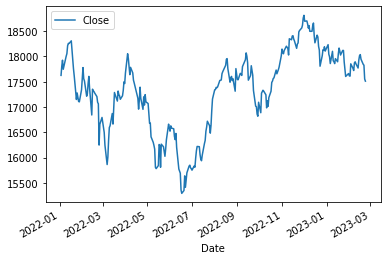

In [14]:
nifty.plot()


In [15]:
# Calculate Baseline Error

from sklearn.metrics import mean_squared_error, mean_absolute_error
nifty["Forecast_Close"] = nifty.Close.shift(1)
nifty = nifty.dropna()
nifty.head()


,Close,Forecast_Close
Date,,
2022-01-04,17805.250000,17625.699219
2022-01-05,17925.250000,17805.250000
2022-01-06,17745.900391,17925.250000
2022-01-07,17812.699219,17745.900391
2022-01-10,18003.300781,17812.699219


In [16]:
error = mean_squared_error(nifty.Close,nifty.Forecast_Close)
Baseline_Error =np.sqrt(error)
print("Baseline Error : ",Baseline_Error)

Baseline Error :  177.81305585706164


In [17]:
# Check for Stationarity

from statsmodels.tsa.stattools import adfuller
test = adfuller (nifty["Close"])
test

(-1.8901335627613014,
 0.33671673466431423,
 0,
 284,
 {'1%': -3.4535872903895797,
  '5%': -2.871771355211212,
  '10%': -2.5722217283277127},
 3538.2749711333963)

In [18]:
# p-value > 0.5 : Data is Non-Stationary
# We have to do Differencing in order to convert the data into Stationary

In [19]:
# Differencing

nifty["Diff_1"] = nifty.Close-(nifty.Forecast_Close)
nifty

<ipython-input-19-e0e8a66a6078>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty["Diff_1"] = nifty.Close-(nifty.Forecast_Close)


,Close,Forecast_Close,Diff_1
Date,,,
2022-01-04,17805.250000,17625.699219,179.550781
2022-01-05,17925.250000,17805.250000,120.000000
2022-01-06,17745.900391,17925.250000,-179.349609
2022-01-07,17812.699219,17745.900391,66.798828
2022-01-10,18003.300781,17812.699219,190.601562
...,...,...,...
2023-02-17,17944.199219,18035.849609,-91.650391
2023-02-20,17844.599609,17944.199219,-99.599609
2023-02-21,17826.699219,17844.599609,-17.900391


In [20]:
# Check for Stationarity again

test_diff = adfuller (nifty["Diff_1"])
test_diff


(-16.819024554683452,
 1.1823780698373536e-29,
 0,
 284,
 {'1%': -3.4535872903895797,
  '5%': -2.871771355211212,
  '10%': -2.5722217283277127},
 3541.4059760855407)

In [21]:
# p-value < 0.5 : Data is Stationary

In [22]:
# Check for Seasonality

from statsmodels.tsa.seasonal import seasonal_decompose


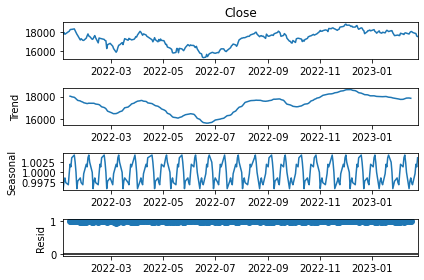

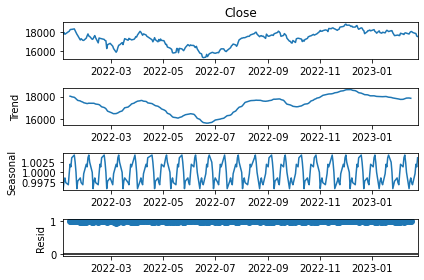

In [23]:
decomposition = seasonal_decompose(nifty['Close'], model='multiplicative', period=12)
decomposition.plot()

In [24]:
# Chart Clearly showing data is Not Seasonal

In [25]:
# Identification of AR and MA Models

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<AxesSubplot:xlabel='Date'>

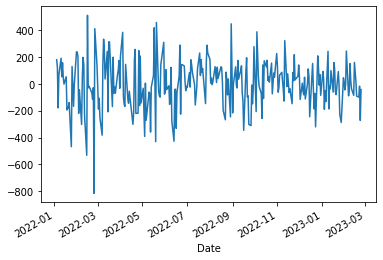

In [26]:
nifty.Diff_1.plot()

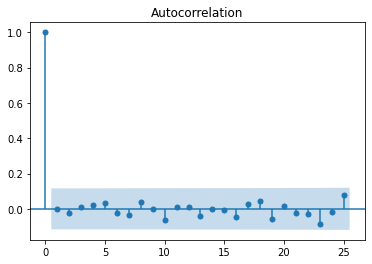

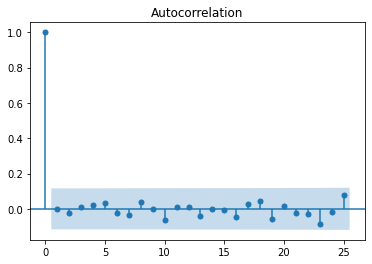

In [27]:
plot_acf(nifty.Diff_1)

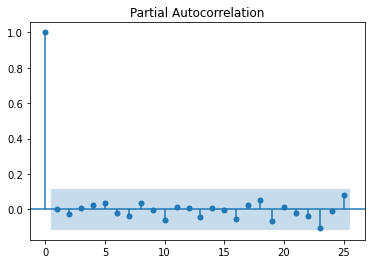

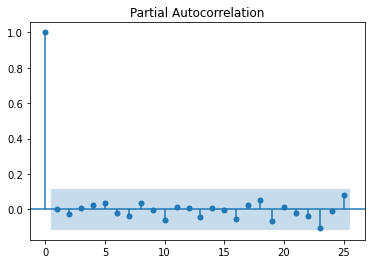

In [28]:
plot_pacf(nifty.Diff_1)

In [29]:
# Calculate p,d,q

# Here :
# p = AR Model Lags = PACF Plot = 1
# d = Differecing = 1
# q = MA Model Lags = ACF Plot = 1

In [30]:
# Train Test Split

train_data = nifty.Close[:250]
test_data = nifty.Close[250:]

In [31]:
Forecast= test_data.to_frame()

In [ ]:
# Model Training using ARIMA
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data,order=(1,1,1))
model_fit = model.fit()


In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  249
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1651.746
Method:                       css-mle   S.D. of innovations            183.934
Date:                Mon, 27 Feb 2023   AIC                           3311.492
Time:                        16:11:02   BIC                           3325.562
Sample:                             1   HQIC                          3317.155
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9575     11.724      0.082      0.935     -22.021      23.936
ar.L1.D.Close    -0.8207      0.787     -1.043      0.297      -2.363       0.722
ma.L1.D.Close     0.8313      0.765      1.086      0.277      -0.669       2.331
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2184           +0.0000j            1.2184            0.5000
MA.1           -1.2029           +0.0000j            1.2029            0.5000
-----------------------------------------------------------------------------
"""

In [34]:
model_forecast = model_fit.forecast(steps=35)[0]

In [35]:
Forecast["model_forecast"] = model_forecast[:35]
Forecast.head()

,Close,model_forecast
Date,,
2023-01-05,17992.150391,18042.161961
2023-01-06,17859.449219,18044.551456
2023-01-09,18101.199219,18044.333642
2023-01-10,17914.150391,18046.255768
2023-01-11,17895.699219,18046.421546


<AxesSubplot:xlabel='Date'>

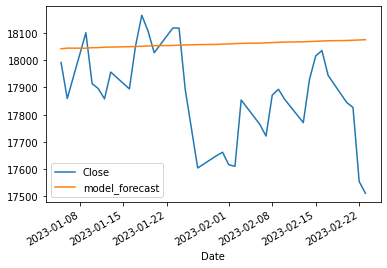

In [36]:
Forecast.plot()

In [37]:
# Calculate ARIMA Error

ARIMA_Error = np.sqrt(mean_squared_error(Forecast["Close"],Forecast["model_forecast"]))
print("ARIMA Error : ", ARIMA_Error)


ARIMA Error :  257.56582421127484


In [38]:
# Compare
print("Baseline Error : ",Baseline_Error)
print("ARIMA Error : ", ARIMA_Error)

Baseline Error :  177.81305585706164
ARIMA Error :  257.56582421127484


In [39]:
# Conclusion
# ARIMA Error > Baseline Error 
# Therefore, ARIMA was not Ideal to Forecast this particular Nifty Data.